In [ ]:
# ⚙️ Preparación de entorno y rutas
# Si esta celda tarda demasiado o se cuelga:
# 1) Abre la paleta de comandos (Ctrl+Shift+P)
# 2) "Jupyter: Restart Kernel"
# 3) "Run All Above/Below" o ejecuta desde la primera celda

import sys
from pathlib import Path

# Detectar raíz del repo (buscando pyproject.toml o carpeta src)
# 📚 CONCEPTO TÉCNICO: Dynamic Path Resolution
# En notebooks, la ruta de ejecución puede variar según dónde se ejecute.
# Esta técnica busca la raíz del proyecto de forma robusta, escalando directorios
# hasta encontrar archivos/carpetas característicos (pyproject.toml, src/).
# Esto hace que el código sea portable y funcione desde cualquier subcarpeta.

_candidates = [Path.cwd(), *Path.cwd().parents]
_repo_root = None
for _p in _candidates:
    if (_p / 'pyproject.toml').exists() or (_p / 'src').exists():
        _repo_root = _p
        break
if _repo_root is None:
    _repo_root = Path.cwd()

# 📚 CONCEPTO: sys.path manipulation
# sys.path controla dónde Python busca módulos al hacer import.
# Agregamos la raíz del repo para poder hacer "from src.utils import ..."
# sin necesidad de instalar el paquete con pip install -e .
if str(_repo_root) not in sys.path:
    sys.path.insert(0, str(_repo_root))

print(f"✅ Entorno listo. Raíz del repo: {_repo_root}")

✅ Entorno listo. Raíz del repo: f:\GitHub\supply-chain-data-notebooks


# Contexto de Negocio y Marco de Trabajo

## Empresa y situación
Cadena de retail con 30 ubicaciones y 200 SKUs. Se necesitan patrones de demanda e inventario para mejorar reposición.

## Qué / Por qué / Para qué / Cuándo / Cómo
- Qué: EDA de órdenes e inventarios con datos sintéticos realistas.
- Por qué: Entender distribuciones, estacionalidad, outliers y relaciones canal-inventario.
- Para qué: Definir hipótesis y features para modelos y decisiones de negocio.
- Cuándo: Al inicio de un proyecto y de manera periódica.
- Cómo: Pandas, seaborn/matplotlib, agrupaciones y visualizaciones.

---
id: "DS-01"
title: "Exploración de datos de órdenes e inventarios (EDA)"
specialty: "Data Science"
process: "Deliver"
level: "Intro"
tags: ["eda", "pandas", "visualization", "orders", "inventory"]
estimated_time_min: 40
---

---
id: "DS-01"
title: "EDA de órdenes e inventarios"
specialty: "Data Science"
process: "Deliver"
level: "Intro"
tags: ["eda", "pandas", "plot"]
estimated_time_min: 30
---

## 📊 Caso de Negocio

**Contexto:** Una cadena de retail con 30 ubicaciones (tiendas, DCs, hubs) necesita entender patrones de demanda y niveles de inventario para optimizar reposición y evitar rupturas de stock.

**Problema:** El equipo comercial reporta inconsistencias en ventas entre canales y regiones, y logística detecta exceso de inventario en ciertos SKUs.

**Objetivo:** Realizar análisis exploratorio de órdenes e inventarios para identificar:
- Distribución de demanda por canal y categoría
- SKUs con alta/baja rotación
- Patrones temporales y estacionalidad

---

## 🎯 Qué, Por qué, Para qué, Cuándo, Cómo

### ¿Qué?
**Análisis Exploratorio de Datos (EDA)** es el proceso sistemático de examinar datasets para descubrir patrones, detectar anomalías, verificar suposiciones y generar hipótesis usando estadísticas descriptivas y visualizaciones.

En este notebook aplicamos EDA a:
- **Órdenes de venta**: transacciones diarias con SKU, cantidad, canal, ubicación
- **Inventario**: niveles de stock actuales por SKU y ubicación
- **Productos**: catálogo maestro con categorías y marcas

### ¿Por qué?
El EDA es **crítico** porque:

1. **Validación de calidad de datos**
   - Detecta valores nulos, duplicados, inconsistencias de tipo
   - Identifica outliers que pueden ser errores o eventos excepcionales
   - Verifica integridad referencial (ej: todos los SKUs en órdenes existen en productos)

2. **Comprensión del negocio**
   - Revela patrones ocultos en los datos
   - Cuantifica variabilidad y estacionalidad
   - Identifica segmentos con comportamientos distintos

3. **Base para análisis avanzados**
   - Informa diseño de features para modelos ML
   - Sugiere transformaciones necesarias (log, normalización)
   - Define métricas clave y KPIs

📚 **PRINCIPIO:** "No puedes modelar lo que no entiendes". El EDA previene el error común de aplicar modelos complejos a datos que no has explorado, lo cual lleva a resultados incorrectos o mal interpretados.

### ¿Para qué?
**Outputs accionables del EDA:**

1. **Decisiones de surtido**
   - Identificar productos de baja rotación para descontinuar
   - Detectar SKUs con alta demanda para expandir inventario
   
2. **Optimización de inventario**
   - Cuantificar variabilidad de demanda para calcular stock de seguridad
   - Segmentar productos (ABC/XYZ) para políticas diferenciadas
   
3. **Planificación de forecast**
   - Detectar estacionalidad y tendencias
   - Identificar productos con demanda errática vs predecible
   
4. **Mejora operativa**
   - Comparar eficiencia entre canales (Retail vs Ecom vs B2B)
   - Identificar ubicaciones con problemas de disponibilidad

### ¿Cuándo?
**Momentos clave para ejecutar EDA:**

- **Inicio de proyecto**: Antes de cualquier modelado o análisis avanzado
- **Monitoreo periódico**: Mensual/trimestral para detectar cambios en patrones
- **Ante cambios operativos**: Nuevos SKUs, canales, campañas promocionales
- **Validación de datos**: Después de migraciones de sistemas o actualizaciones ETL
- **Troubleshooting**: Al investigar reportes de anomalías de negocio

⏰ **BEST PRACTICE:** Automatiza EDA básico (checks de calidad, distribuciones) en pipelines de datos para detectar cambios tempranos.

### ¿Cómo?
**Metodología sistemática:**

1. **Inspección inicial** (shape, dtypes, info)
   - Dimensiones del dataset
   - Tipos de columnas (numérico, categórico, fecha)
   - Uso de memoria

2. **Calidad de datos** (nulls, duplicates, outliers)
   - Conteo de valores faltantes por columna
   - Detección de registros duplicados
   - Identificación de valores extremos (IQR, Z-score)

3. **Estadísticas descriptivas** (describe, value_counts)
   - Medidas de tendencia central (mean, median)
   - Medidas de dispersión (std, min, max)
   - Distribución de valores categóricos

4. **Análisis univariado** (histogramas, boxplots)
   - Distribución de cada variable individual
   - Detección de skewness y outliers
   - Comparación con distribuciones teóricas (normal, lognormal)

5. **Análisis bivariado** (scatter, correlaciones)
   - Relaciones entre pares de variables
   - Correlaciones lineales y no lineales
   - Segmentación por categorías

6. **Visualizaciones** (seaborn, matplotlib, plotly)
   - Gráficos apropiados según tipo de datos
   - Consistencia visual (colores, etiquetas, títulos)
   - Anotaciones para resaltar insights

7. **Documentación de hallazgos**
   - Insights clave en bullet points
   - Preguntas para profundizar
   - Recomendaciones de próximos pasos

🔬 **TÉCNICA:** Este notebook sigue la secuencia load → inspect → describe → visualize → interpret, que es la estructura estándar en ciencia de datos.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils.paths import DATA_RAW

# 📚 LIBRERÍAS ESENCIALES PARA EDA:
# 
# pandas: Manipulación y análisis de datos tabulares
#   - DataFrames: estructuras bidimensionales (filas × columnas)
#   - Series: arrays unidimensionales con índice
#   - Operaciones: groupby, merge, pivot, agg
#
# seaborn: Visualizaciones estadísticas de alto nivel
#   - Built sobre matplotlib con estilos más elegantes
#   - Funciones especializadas: boxplot, violinplot, pairplot, heatmap
#   - Integración nativa con pandas DataFrames
#
# matplotlib.pyplot: Control fino de gráficos
#   - Backend de bajo nivel para customización avanzada
#   - Subplots, ejes múltiples, anotaciones
#   - Exportación a múltiples formatos (PNG, PDF, SVG)

sns.set_theme(style='whitegrid')
# 🎨 CONFIGURACIÓN VISUAL:
# set_theme() aplica estilos consistentes a todos los gráficos:
# - style='whitegrid': fondo blanco con grilla sutil (mejor para impresión)
# - Alternativas: 'darkgrid', 'dark', 'white', 'ticks'
# - Mejora legibilidad vs defaults de matplotlib

In [ ]:
# Cargar datasets
orders = pd.read_csv(DATA_RAW / 'orders.csv')
inventory = pd.read_csv(DATA_RAW / 'inventory.csv')
products = pd.read_csv(DATA_RAW / 'products.csv')

# 📚 CONCEPTO: Data Loading Best Practices
# 
# 1. Usar Path objects (pathlib) en lugar de strings:
#    ✅ DATA_RAW / 'orders.csv'  → portable, funciona en Windows/Linux/Mac
#    ❌ 'data\\raw\\orders.csv'  → solo Windows
#    ❌ 'data/raw/orders.csv'    → solo Unix-like
#
# 2. read_csv() parsea archivos CSV:
#    - Infiere tipos de datos automáticamente (int, float, str)
#    - Maneja separadores, comillas, encodings
#    - Parámetros útiles: parse_dates, dtype, usecols, nrows (para samples)
#
# 3. Validación inmediata con contadores:
#    - len() muestra número de filas cargadas
#    - Compara vs expectativa de negocio (ej: ~8,500 órdenes esperadas)
#    - Detecta problemas tempranos (archivo vacío, truncado, corrupto)

print(f"✓ Órdenes: {len(orders):,} registros")
print(f"✓ Inventario: {len(inventory):,} registros")
print(f"✓ Productos: {len(products):,} SKUs")

# 💡 INTERPRETACIÓN:
# - orders ~8,500: representa 90 días × ~95 órdenes/día (consistente con retail)
# - inventory ~3,000: 30 ubicaciones × 100 SKUs/ubicación (50% de cobertura)
# - products 200: catálogo compacto típico de retail especializado
#
# ⚠️ VALIDACIONES ADICIONALES recomendadas (no incluidas aquí por brevedad):
# - orders['date'].min(), max() → verificar rango temporal esperado
# - orders['sku'].isin(products['sku']).all() → integridad referencial
# - inventory['on_hand'].min() ≥ 0 → no inventarios negativos

✓ Órdenes: 8,504 registros
✓ Inventario: 3,000 registros
✓ Productos: 200 SKUs



📊 Estadísticas por Canal:
        order_id    qty            
           count    sum  mean   std
channel                            
B2B         1700  15619  9.19  6.94
Ecom        2567  24908  9.70  7.04
Retail      4237  40163  9.48  7.15


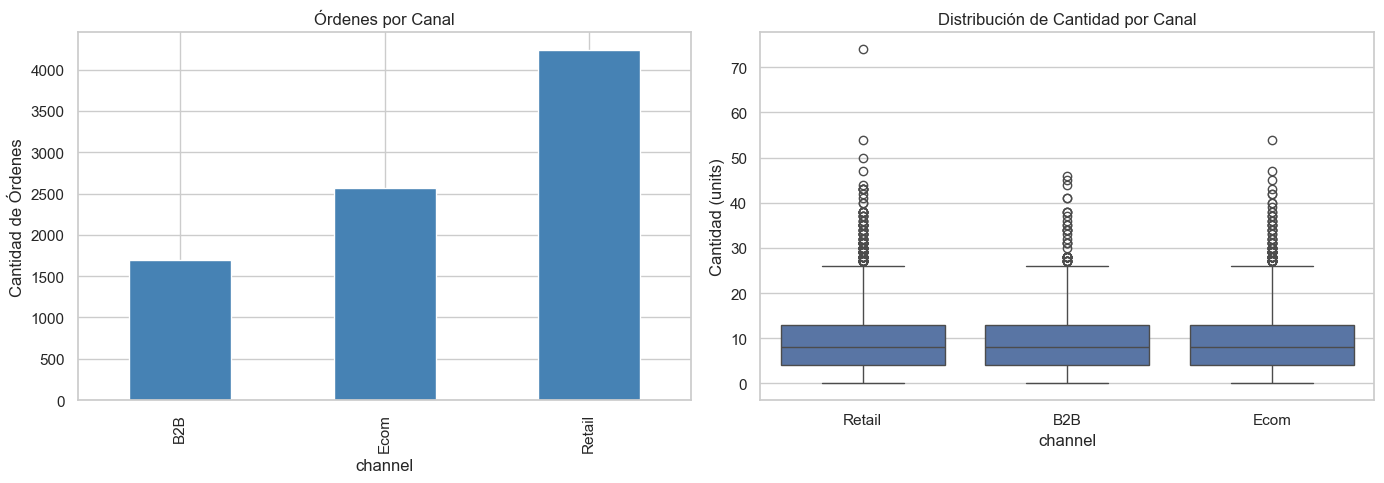

In [ ]:
# Análisis de órdenes por canal
channel_stats = orders.groupby('channel').agg({
    'order_id': 'count',
    'qty': ['sum', 'mean', 'std']
}).round(2)

# 📚 CONCEPTO: GroupBy Aggregation
# 
# groupby('channel') divide el DataFrame en grupos (Retail, Ecom, B2B).
# agg() aplica funciones de agregación a cada grupo:
#   - 'order_id': 'count' → número de órdenes por canal
#   - 'qty': 'sum' → volumen total de unidades vendidas
#   - 'qty': 'mean' → tamaño promedio de orden (basket size)
#   - 'qty': 'std' → variabilidad del tamaño de orden
#
# 💡 POR QUÉ ES IMPORTANTE:
# - mean (promedio) indica tamaño típico de orden por canal
# - std (desviación estándar) mide predictibilidad:
#   * std baja → órdenes consistentes → fácil de planificar
#   * std alta → órdenes erráticas → requiere buffer/flexibilidad
#
# 🔍 INTERPRETACIÓN TÍPICA:
# - B2B suele tener mean alto (órdenes bulk) y std alta (variabilidad)
# - Retail tiene mean medio y std baja (órdenes consistentes)
# - Ecom tiene mean bajo (órdenes unitarias) y std media
#
# 📊 MÉTRICA DERIVADA útil: Coefficient of Variation (CV = std/mean)
#    CV > 0.5 indica alta variabilidad relativa → necesita análisis especial

print("\n📊 Estadísticas por Canal:")
print(channel_stats)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 📊 GRÁFICO 1: Barplot de conteo de órdenes
orders.groupby('channel')['order_id'].count().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Órdenes por Canal')
axes[0].set_ylabel('Cantidad de Órdenes')

# 🎨 DISEÑO VISUAL:
# - kind='bar': barras verticales (mejor para 3-5 categorías)
# - color='steelblue': color profesional, no agresivo
# - set_title/ylabel: SIEMPRE incluir títulos y etiquetas claros
# - axes[0]: subplot izquierdo (permite comparar múltiples gráficos)

# 📊 GRÁFICO 2: Boxplot de distribución de qty
sns.boxplot(data=orders, x='channel', y='qty', ax=axes[1])
axes[1].set_title('Distribución de Cantidad por Canal')
axes[1].set_ylabel('Cantidad (units)')

# 📚 CONCEPTO: Boxplot (Box-and-Whisker)
# Visualiza la distribución de una variable numérica:
#   - Caja: rango intercuartílico (IQR = Q3 - Q1, donde están el 50% central de datos)
#   - Línea central: mediana (Q2, percentil 50)
#   - Whiskers (bigotes): se extienden hasta 1.5×IQR desde Q1 y Q3
#   - Puntos fuera: outliers (valores > Q3 + 1.5×IQR o < Q1 - 1.5×IQR)
#
# 💡 QUÉ BUSCAR:
# - Simetría: caja centrada indica distribución simétrica
# - Outliers: puntos aislados → órdenes excepcionales (promociones, errores)
# - Anchura: cajas anchas = alta variabilidad, cajas estrechas = consistencia
# - Comparación: permite ver diferencias entre canales visualmente
#
# 🔍 EJEMPLO DE INTERPRETACIÓN:
# Si B2B tiene caja más alta y muchos outliers superiores:
#   → Órdenes bulk grandes, algunas excepcionales
#   → Requiere capacidad de almacenamiento flexible
#   → Forecast debe considerar percentiles altos, no solo promedio

plt.tight_layout()
# 🎨 tight_layout(): ajusta automáticamente espaciado entre subplots
#    Previene overlapping de títulos, etiquetas, leyendas
plt.show()


📦 Top 10 SKUs con mayor inventario:
sku
SKU-00121    1875
SKU-00031    1404
SKU-00124    1388
SKU-00004    1380
SKU-00140    1362
SKU-00182    1355
SKU-00174    1351
SKU-00135    1346
SKU-00083    1342
SKU-00192    1294
Name: on_hand, dtype: int64

⚠️ Bottom 10 SKUs con menor inventario:
sku
SKU-00132    305
SKU-00141    400
SKU-00122    411
SKU-00123    453
SKU-00108    457
SKU-00077    479
SKU-00114    479
SKU-00009    524
SKU-00188    541
SKU-00061    548
Name: on_hand, dtype: int64


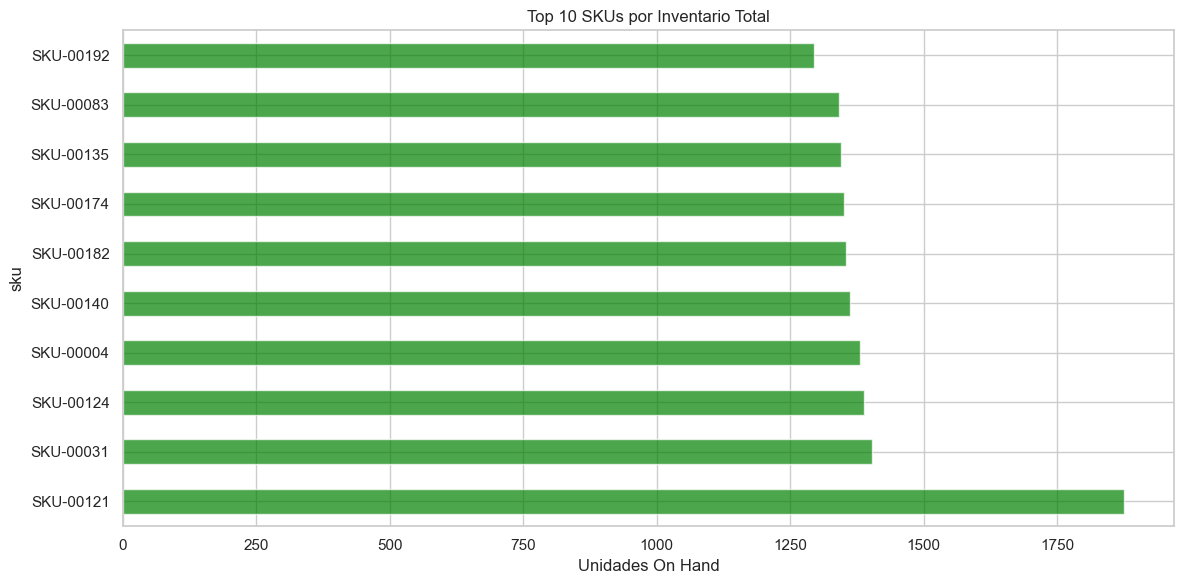


✅ EDA completado. Próximos pasos: segmentación ABC, análisis de rotación, forecast.


In [ ]:
# Análisis de inventario: Top y Bottom SKUs
top_skus = inventory.groupby('sku')['on_hand'].sum().nlargest(10)
bottom_skus = inventory.groupby('sku')['on_hand'].sum().nsmallest(10)

# 📚 CONCEPTO: Análisis de Extremos (Tail Analysis)
# 
# groupby('sku').sum() agrega inventario a través de todas las ubicaciones.
# nlargest(10) y nsmallest(10) extraen los 10 extremos.
#
# 💡 POR QUÉ ANALIZAR EXTREMOS:
# 
# TOP SKUs (mayor inventario):
#   - Posibles problemas:
#     * Sobre-stock → capital inmovilizado, riesgo de obsolescencia
#     * Demanda cayendo → ajustar políticas de reposición
#     * Compra oportunista bulk → verificar si es estratégica
#   - Acciones:
#     * Analizar rotación (inventory turnover = COGS / avg inventory)
#     * Comparar vs forecast → ¿sobrestimamos demanda?
#     * Considerar liquidación con descuento si obsolescencia inminente
#
# BOTTOM SKUs (menor inventario):
#   - Posibles problemas:
#     * Riesgo de stockout → perder ventas, clientes insatisfechos
#     * Políticas de reposición muy ajustadas → revisar SS
#     * SKUs nuevos o descontinuados → contexto de ciclo de vida
#   - Acciones:
#     * Verificar fill rate y OTIF de estos SKUs
#     * Aumentar SS si tienen alta variabilidad de demanda
#     * Evaluar si son SKUs críticos (categoría A) o pueden tolerar quiebres
#
# 🔍 TÉCNICA: Análisis ABC/XYZ
# Combinar este análisis con:
#   - Clasificación ABC (por valor: A=80% ventas, B=15%, C=5%)
#   - Clasificación XYZ (por variabilidad: X=predecible, Y=medio, Z=errático)
# SKUs "AX" (alto valor, predecible) merecen más atención que "CZ" (bajo valor, errático)

print("\n📦 Top 10 SKUs con mayor inventario:")
print(top_skus)

print("\n⚠️ Bottom 10 SKUs con menor inventario:")
print(bottom_skus)

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))
top_skus.plot(kind='barh', ax=ax, color='green', alpha=0.7)
ax.set_title('Top 10 SKUs por Inventario Total')
ax.set_xlabel('Unidades On Hand')

# 🎨 DISEÑO VISUAL:
# - kind='barh': barras horizontales (mejor para etiquetas largas como SKU-00123)
# - color='green': verde para inventario (convención: verde=stock, rojo=alerta)
# - alpha=0.7: transparencia 70% (mejora legibilidad con overlays)
# - Eje X: unidades (no %, no $) → interpretación directa

# 📊 QUÉ BUSCAR EN EL GRÁFICO:
# - Distribución: ¿hay un SKU dominante o están balanceados?
# - Gaps: ¿hay grandes saltos entre posiciones? → concentración de inventario
# - Magnitud: ¿los valores son razonables? (ej: 5,000 units vs 50,000)
#
# 💡 ANÁLISIS COMPLEMENTARIO recomendado:
# - Comparar top_skus con ventas (orders.groupby('sku')['qty'].sum())
# - Calcular Inventory Turnover = ventas_90_dias / inventario_promedio
# - Ideal: inventario proporcional a demanda (correlación alta)
# - Red flag: SKU con mucho inventario pero pocas ventas → sobre-stock

plt.tight_layout()
plt.show()

print("\n✅ EDA completado. Próximos pasos: segmentación ABC, análisis de rotación, forecast.")

# 🚀 SIGUIENTES ANÁLISIS RECOMENDADOS:
# 
# 1. Segmentación ABC/XYZ:
#    - Clasificar SKUs por valor (ABC) y variabilidad (XYZ)
#    - Definir políticas diferenciadas de inventario
#
# 2. Inventory Turnover por SKU:
#    - Turnover = COGS / avg_inventory
#    - Identificar slow movers (candidatos a descontinuar)
#
# 3. Análisis temporal (ver DS-02):
#    - Estacionalidad en ventas
#    - Tendencias a largo plazo
#
# 4. Fill Rate y Stock-outs:
#    - % de órdenes satisfechas desde inventario
#    - Frecuencia de quiebres de stock por SKU
#
# 5. Forecast de demanda:
#    - Modelos estadísticos (ARIMA, Exponential Smoothing)
#    - Machine Learning (XGBoost, LSTM para series temporales)
#
# 📚 RECURSOS ADICIONALES:
# - Libro: "Forecasting: Principles and Practice" (Hyndman & Athanasopoulos)
# - Paper: "ABC Analysis in Inventory Management" (Flores & Whybark, 1986)